In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

vantage1 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample1.CSV', encoding = "ISO-8859-1")
vantage2 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample2.CSV', encoding = "ISO-8859-1")

print(vantage1.shape)
print(vantage2.shape)

#print(vantage1.describe())
#print(vantage2.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,32,33,42,63,66,72,76,128,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(12417, 147)
(44643, 146)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We can actually reduce it to the columns that are useful for prediction, and make sure to leave out the ones we found to be null earlier. We have retained some columns that are not predictive/predictable but provide identifying information.

In [0]:
useful_cols1 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'Deductible']
#the second set includes the non-null CAUSE column and does not include Deductible (that column does not exist in the second dataset)
useful_cols2 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'CAUSE']

In [0]:
vantage1 = vantage1[useful_cols1]
vantage2 = vantage2[useful_cols2]

Now we check for duplicates and remove them, keeping only the first occurrence.

In [0]:
vantage1.drop_duplicates(keep='first', inplace=True)
vantage2.drop_duplicates(keep='first', inplace=True)

Now we check how sparse our columns are and plot their distributions. We will first focus on the larger dataset, vantage2.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


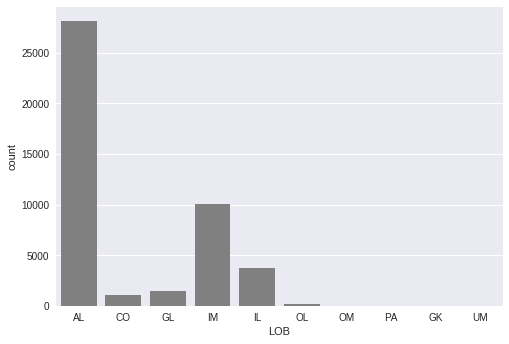

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(vantage2['LOB'], color='gray')

As we are focusing on cars and drivers, we need only AL (automobile liability) data.

In [0]:
vantage2 = vantage2[vantage2['LOB'] == 'AL']

In [0]:
print(vantage2['DRIVERAGE'].count())
print(list(vantage2['DRIVERAGE']).count(0))
print(vantage2['DOB'].count())
print(vantage2['LOCSTATE'].count())

28146
12318
3382
27960


So we have 15828 values of DRIVERAGE that are neither null nor 0

In [0]:
#len(vantage2[vantage2['LOCSTATE'].notnull()].index.tolist())
age_list = list(vantage2['DRIVERAGE'])
age_list = [int(x) for x in age_list if (isinstance(x,str) and x.isdigit() and x != "0") or (isinstance(x,int) and x != 0)]
print(len(age_list))

12703


In [0]:
print(vantage2.DRIVERAGE.apply(type).unique())
print(vantage2.VEHYEAR.apply(type).unique())
print(vantage2.AWM_Cause_Code.apply(type).unique())
print(vantage2.LOCSTATE.apply(type).unique())
print(vantage2.CGENDER.apply(type).unique())

[<class 'int'> <class 'str'>]
[<class 'int'>]
[<class 'float'> <class 'str'>]
[<class 'str'> <class 'float'>]
[<class 'str'> <class 'float'>]


In [0]:
"""
import numpy as np
driverage = np.array(vantage2['DRIVERAGE'])
driverage_indices = np.where(np.logical_and(driverage != 0, driverage != '0'))[0]
print(len(driverage_indices))

locstate_indices = vantage2[vantage2['LOCSTATE'].notnull()].index.tolist()
print(len(locstate_indices))

gender = np.array(vantage2['CGENDER'])
gender_indices = np.where(np.logical_or(gender == 'M', gender == 'F'))[0]
#gender_indices = vantage2[vantage2['CGENDER'].notnull()].index.tolist()
print(len(gender_indices))

vehyear = np.array(vantage2['VEHYEAR'])
vehyear_indices = np.where(vehyear != 0)[0]
print(len(vehyear_indices))

awm_indices = vantage2[vantage2['AWM_Cause_Code'].notnull()].index.tolist()
print(len(awm_indices))

cause_indices = vantage2[vantage2['CAUSE'].notnull()].index.tolist()
print(len(cause_indices))

#medpaid
#claim length
#incurred
#cause
"""

"\nimport numpy as np\ndriverage = np.array(vantage2['DRIVERAGE'])\ndriverage_indices = np.where(np.logical_and(driverage != 0, driverage != '0'))[0]\nprint(len(driverage_indices))\n\nlocstate_indices = vantage2[vantage2['LOCSTATE'].notnull()].index.tolist()\nprint(len(locstate_indices))\n\ngender = np.array(vantage2['CGENDER'])\ngender_indices = np.where(np.logical_or(gender == 'M', gender == 'F'))[0]\n#gender_indices = vantage2[vantage2['CGENDER'].notnull()].index.tolist()\nprint(len(gender_indices))\n\nvehyear = np.array(vantage2['VEHYEAR'])\nvehyear_indices = np.where(vehyear != 0)[0]\nprint(len(vehyear_indices))\n\nawm_indices = vantage2[vantage2['AWM_Cause_Code'].notnull()].index.tolist()\nprint(len(awm_indices))\n\ncause_indices = vantage2[vantage2['CAUSE'].notnull()].index.tolist()\nprint(len(cause_indices))\n\n#medpaid\n#claim length\n#incurred\n#cause\n"

In [0]:
#age_list = [int(x) for x in age_list if (isinstance(x,str) and x.isdigit() and x != "0") or (isinstance(x,int) and x != 0)]

#return [i for i,x in enumerate(driverage) if (isinstance(x,str) and x.isdigit() and x != "0") or (isinstance(x,int) and x != 0)]
driverage = list(vantage2['DRIVERAGE'])
driverage_indices = [i for i,x in enumerate(driverage) if (isinstance(x,int) and x != 0)]
#(isinstance(x,str) and x.isdigit() and x != "0") or
print(len(driverage_indices))

#locstate_indices = vantage2[vantage2['LOCSTATE'].notnull()].index.tolist()
locstate = list(vantage2['LOCSTATE'])
locstate_indices = [i for i,x in enumerate(locstate) if isinstance(x,str)]
print(len(locstate_indices))

gender = list(vantage2['CGENDER'])
gender_indices =  [i for i,x in enumerate(gender) if isinstance(x,str) and (x=='M' or x=='F')]
#gender_indices = vantage2[vantage2['CGENDER'].notnull()].index.tolist()
print(len(gender_indices))

vehyear = list(vantage2['VEHYEAR'])
vehyear_indices = [i for i,x in enumerate(vehyear) if (isinstance(x,int) and x !=0 and x != '0')]
print(len(vehyear_indices))

awm_indices = vantage2[vantage2['AWM_Cause_Code'].notnull()].index.tolist()
print(len(awm_indices))

cause_indices = vantage2[vantage2['CAUSE'].notnull()].index.tolist()
print(len(cause_indices))

10590
27960
4625
23840
8373
6807


In [0]:
driverage_values = [x for i,x in enumerate(driverage) if (isinstance(x,int) and x != 0)]
print(driverage_values)
print(list(vantage2['DRIVERAGE']))
print(driverage_indices)
print(locstate_indices)
print(awm_indices)
print(vehyear_indices)
print(gender_indices)

[56, 39, 39, 39, 45, 48, 26, 26, 26, 26, 26, 38, 25, 26, 26, 48, 56, 21, 69, 41, 30, 46, 38, 38, 38, 48, 32, 52, 52, 35, 43, 55, 35, 26, 24, 34, 28, 40, 22, 22, 28, 35, 25, 30, 25, 37, 41, 47, 47, 33, 33, 47, 23, 52, 40, 53, 36, 36, 45, 23, 23, 57, 38, 36, 32, 61, 59, 59, 22, 22, 42, 25, 25, 56, 47, 28, 28, 47, 47, 47, 74, 50, 50, 50, 44, 44, 44, 44, 52, 52, 52, 53, 51, 59, 49, 43, 65, 23, 65, 38, 44, 29, 35, 47, 47, 47, 48, 40, 53, 53, 59, 35, 31, 71, 71, 46, 36, 36, 36, 36, 60, 60, 36, 36, 36, 36, 36, 36, 36, 47, 51, 51, 52, 64, 52, 69, 41, 31, 39, 53, 55, 39, 47, 49, 34, 53, 59, 59, 55, 37, 37, 62, 32, 32, 15, 23, 62, 28, 31, 59, 27, 22, 46, 47, 51, 36, 36, 36, 26, 59, 45, 66, 20, 55, 28, 28, 28, 27, 39, 29, 22, 22, 22, 22, 48, 48, 22, 42, 42, 56, 56, 56, 70, 46, 42, 39, 51, 51, 51, 45, 45, 40, 40, 29, 63, 31, 48, 28, 28, 28, 28, 28, 57, 31, 35, 52, 48, 65, 46, 64, 60, 52, 60, 38, 27, 62, 92, 51, 61, 24, 27, 55, 41, 30, 49, 49, 49, 41, 43, 56, 66, 33, 50, 40, 48, 48, 65, 29, 71, 38,

In [0]:
from itertools import groupby
vehyear_values = [x for i,x in enumerate(vehyear) if (isinstance(x,int) and x !=0 and x != '0')]
print(set(vehyear_values))
driverage_values = [x for i,x in enumerate(driverage) if (isinstance(x,int) and x != 0)]
print(set(driverage_values))

{1936, 1950, 1953, 1955, 1960, 1963, 1964, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 1900, 1901}
{1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 91, 92}


Now we find out how many rows have all of these columns filled (which turned out to be 0), or a subset of them

In [0]:
driver_loc_vehyear = set(driverage_indices).intersection(set(locstate_indices), set(vehyear_indices))#, set(gender_indices), set(awm_indices), set(cause_indices))
print(len(driver_loc_vehyear))

driver_loc_vehyear_gender = set(driverage_indices).intersection(set(locstate_indices), set(vehyear_indices), set(gender_indices))#, set(awm_indices), set(cause_indices))
print(len(driver_loc_vehyear_gender))

driver_loc_vehyear_awm =  set(driverage_indices).intersection(set(locstate_indices), set(vehyear_indices), set(awm_indices))#, set(gender_indices), set(cause_indices))
print(len(driver_loc_vehyear_awm))

driver_loc_vehyear_cause =  set(driverage_indices).intersection(set(locstate_indices), set(vehyear_indices), set(cause_indices))#, set(gender_indices), set(cause_indices))
print(len(driver_loc_vehyear_cause))

driver_loc_vehyear_awm_gender =  set(driverage_indices).intersection(set(locstate_indices), set(vehyear_indices), set(awm_indices), set(gender_indices))#, set(cause_indices))
print(len(driver_loc_vehyear_awm_gender))

9929
1928
1752
1099
328


In [0]:
print(sorted(list(driver_loc_vehyear_gender)))

[1, 2, 7, 10, 12, 13, 14, 65, 71, 77, 93, 98, 100, 109, 127, 140, 142, 144, 149, 150, 153, 154, 155, 182, 201, 203, 204, 210, 212, 214, 226, 319, 328, 329, 332, 333, 367, 372, 374, 382, 383, 385, 386, 424, 426, 428, 445, 462, 467, 469, 492, 496, 497, 512, 513, 522, 530, 543, 556, 558, 560, 563, 584, 598, 599, 603, 605, 618, 623, 624, 625, 627, 647, 648, 653, 671, 708, 721, 723, 733, 772, 787, 802, 804, 809, 819, 832, 849, 855, 874, 881, 889, 890, 913, 932, 933, 948, 951, 982, 984, 1004, 1005, 1007, 1009, 1010, 1011, 1020, 1032, 1043, 1045, 1059, 1060, 1064, 1073, 1075, 1077, 1088, 1094, 1130, 1151, 1158, 1174, 1179, 1183, 1229, 1236, 1237, 1277, 1278, 1279, 1286, 1289, 1290, 1330, 1331, 1404, 1409, 1410, 1411, 1426, 1427, 1430, 1505, 1512, 1573, 1587, 1595, 1596, 1605, 1839, 1840, 1855, 1890, 1897, 1898, 1928, 1936, 1937, 1941, 1975, 2153, 2160, 2169, 2177, 2178, 2192, 2211, 2267, 2274, 2275, 2276, 2277, 2278, 2279, 2316, 2317, 2334, 2335, 2346, 2347, 2354, 2379, 2380, 2401, 2403, 2405

Now we have various combinations of these columns which we can make models out of. Random forests, naive Bayes, support vector regression...

In [0]:
vantage2 = vantage2.reset_index(drop=True) 
#to reset the index and remove gaps
vantage2_dlv = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear)))] #9929 rows
vantage2_dlv = vantage2_dlv[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'INCURRED']]

vantage2_dlv_save = vantage2_dlv

vantage2_dlvg = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear_gender)))] #1928 rows
vantage2_dlvg = vantage2_dlvg[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'CGENDER', 'INCURRED']]

vantage2_dlvg_save = vantage2_dlvg

#We probably can't use the following 2 because we won't know the AWM_Cause_Code beforehand
vantage2_dlva = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear_awm)))]
vantage2_dlva = vantage2_dlva[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'AWM_Cause_Code', 'INCURRED']]

vantage2_dlvag = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear_awm_gender)))]
vantage2_dlvag = vantage2_dlvag[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'AWM_Cause_Code', 'CGENDER', 'INCURRED']]
print(vantage2_dlvg)

      DRIVERAGE LOCSTATE  VEHYEAR CGENDER  INCURRED
1            39       FL     2010       M         0
2            39       FL     2010       M         0
7            48       IN     1996       M    222955
10           26       NJ     2007       M    750000
12           26       NJ     2007       M    755510
13           26       NJ     2007       M    750000
14           26       NJ     2007       M    576288
65           55       CA     2005       M    203560
71           26       FL     2010       M   1200000
77           40       NE     2004       F      7800
93           47       WI     2004       M         0
98           33       TX     2008       F         0
100          23       NY     2011       M    170677
109          36       CA     2005       M    136226
127          59       OK     1994       F    756152
140          28       PA     2000       F   6200000
142          47       TX     2007       F   2219978
144          47       TX     2007       M    864131
149         

Checking high incurred values >5M to see what they have in common:

In [0]:
for index, row in vantage2_dlvg.iterrows():
  if row['INCURRED'] > 5000000:
    print(row['DRIVERAGE'], row['LOCSTATE'], row['VEHYEAR'], row['CGENDER'])

28 PA 2000 F
50 FL 2013 M
48 NJ 2005 M
52 KY 2007 M
48 KY 1995 M
32 CA 2000 M
30 CA 2011 F
40 MA 2004 F
34 FL 2000 F
56 NY 2009 M
52 LA 2005 F
50 VA 2000 M
56 NJ 2004 F
38 PA 1996 M
43 VA 2003 F
70 NY 2016 M
72 NY 2017 M
47 MI 2004 M
29 NY 2007 F
29 NY 2007 M
40 NY 2005 M
38 NY 1993 F
36 CA 1997 F
24 NY 1996 F
34 NY 1997 M
49 TX 2006 M
51 CT 2013 M
50 TX 2015 M
26 NC 1996 M
49 NY 2014 M
49 OR 2000 F
31 NY 1993 M
27 NY 2013 F
35 FL 2013 M
33 KY 2001 M
37 FL 2006 F
37 NY 2013 M
26 FL 2015 M
28 NY 2015 M
42 NY 2015 M
28 OR 2014 M
34 NY 2014 M
46 FL 2013 F
28 LA 1960 F
55 MA 2012 F
52 NY 2013 M
38 NY 2007 F
35 FL 2016 M
36 CA 1986 F
61 CT 2005 M
60 NY 1995 M
43 NJ 2006 M
27 NY 2001 F
22 AR 2012 M
62 NC 2002 M
39 FL 2006 F
48 VA 2000 F
49 MI 2011 M
27 CO 2003 F
70 SC 2013 F
31 CA 2006 M
39 CA 2004 F
39 CA 2004 M
42 CO 2005 F
25 FL 2006 M
54 NY 1998 M
71 CA 2008 M
33 CA 2016 F
33 CA 2016 M
42 TX 2010 F
48 FL 2004 M
32 NY 2008 M
28 FL 2006 F
52 FL 1992 F
25 NY 2014 F
37 FL 2005 F
37 FL 2005 F

In [0]:
vantage_og = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample2.CSV', encoding = "ISO-8859-1")
vantage_og = vantage_og[["DRIVERAGE", "LOCSTATE", "VEHYEAR", "CGENDER", "INCURRED"]]
vantage_og.head(100)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DRIVERAGE LOCSTATE  VEHYEAR CGENDER   INCURRED
0         56       FL     2004             930924
1         39       FL     2010       M          0
2         39       FL     2010       M          0
3         39       AZ     2001             471607
4          0       NE     2011                  0
5          0       CA     2012                  0
6         45       FL     1991             863641
7         48       IN     1996       M     222955
8          0       IA     2005                  0
9          0       VA        0             117500
10         0       NE     2010                  0
11        26       NJ     2007       M     750000
12        26       NJ     2007                  0
13        26       NJ     2007       M     755510
14        26       NJ     2007       M     750000
15        26       NJ     2007       M     576288
16        38       MO     2010             488245
17        25       CA     1996             470968
18        26       CA        0                  0
19        26       CA        0       M          0
20        48       DE     1996                  0
21         0       OK        0             363900
22         0       VA     2007       M     189093
23         0       VA     2007             567775
24         0       CA        0               9500
25        56       GA        0             565270
26        21       NJ     1998            1344554
27         0       CO        0                  0
28         0       CO     1997                  0
29         0       NY     2000              74067
..       ...      ...      ...     ...        ...
70         0       CA        0             491132
71         0       IL        0                  0
72        55       CA     2005       M     203560
73        35       FL     2007              48938
74         0       FL     2007              48938
75         0       UT        0          146096416
76         0       TX     2007            2110656
77         0       WI     2001                  0
78         0       WI     2001             278826
79        26       FL     2010       M    1200000
80        24       CA     2007            1681840
81        34       AL        0             523286
82         0       CA        0                  0
83         0       AZ     2012             109009
84        28       TX     1998             129345
85        40       NE     2004       F       7800
86        22       IL        0       F     281971
87        22       IL        0             399169
88         0       CA     2000              93978
89         0       NY     2008                  0
90         0       NY     2008                  0
91        28       CA     2005             113974
92        35       CA     1997             754365
93         0       MD     2005             903418
94        25       NY     1995                  0
95        30       CA     2014            4100999
96        25       MI     2013             584428
97        37       CA     2004             168731
98         0       OH        0             420000
99        41       CO     2006             246400

[100 rows x 5 columns]

We had to make them all separate datasets because each one has rows that follow a certain rule: a certain set of columns has to be filled.

First we use vantage_dlv, predicting INCURRED based on DRIVERAGE, LOCSTATE and VEHYEAR

In [0]:
locstate_dummies = pd.get_dummies(vantage2_dlv.LOCSTATE)
vantage2_dlv = pd.concat([vantage2_dlv, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlv.VEHYEAR)
vantage2_dlv = pd.concat([vantage2_dlv, vehyear_dummies], axis=1)
vantage2_dlv

DRIVERAGE LOCSTATE  VEHYEAR  INCURRED  AK  AL  AR  AZ  BC  CA  ...   \
0            56       FL     2004    930924   0   0   0   0   0   0  ...    
1            39       FL     2010         0   0   0   0   0   0   0  ...    
2            39       FL     2010         0   0   0   0   0   0   0  ...    
3            39       AZ     2001    471607   0   0   0   1   0   0  ...    
6            45       FL     1991    863641   0   0   0   0   0   0  ...    
7            48       IN     1996    222955   0   0   0   0   0   0  ...    
10           26       NJ     2007    750000   0   0   0   0   0   0  ...    
11           26       NJ     2007         0   0   0   0   0   0   0  ...    
12           26       NJ     2007    755510   0   0   0   0   0   0  ...    
13           26       NJ     2007    750000   0   0   0   0   0   0  ...    
14           26       NJ     2007    576288   0   0   0   0   0   0  ...    
15           38       MO     2010    488245   0   0   0   0   0   0  ...    
16           25       CA     1996    470968   0   0   0   0   0   1  ...    
19           48       DE     1996         0   0   0   0   0   0   0  ...    
24           21       NJ     1998   1344554   0   0   0   0   0   0  ...    
31           69       KY     2006         0   0   0   0   0   0   0  ...    
33           41       CA     2001         0   0   0   0   0   0   1  ...    
35           30       NY     2005    562606   0   0   0   0   0   0  ...    
37           46       TN     2011    528429   0   0   0   0   0   0  ...    
39           38       IL     1999    234614   0   0   0   0   0   0  ...    
40           38       IL     1999     51597   0   0   0   0   0   0  ...    
44           38       IL     1999         0   0   0   0   0   0   0  ...    
46           48       VA     2004         0   0   0   0   0   0   0  ...    
47           32       WA     1999      9200   0   0   0   0   0   0  ...    
50           52       VA     2012    250526   0   0   0   0   0   0  ...    
55           52       MD     2000    262500   0   0   0   0   0   0  ...    
61           43       IL     2001    144485   0   0   0   0   0   0  ...    
65           55       CA     2005    203560   0   0   0   0   0   1  ...    
66           35       FL     2007     48938   0   0   0   0   0   0  ...    
71           26       FL     2010   1200000   0   0   0   0   0   0  ...    
...         ...      ...      ...       ...  ..  ..  ..  ..  ..  ..  ...    
28089        43       MD     2012    589700   0   0   0   0   0   0  ...    
28090        60       CA     1994    792351   0   0   0   0   0   1  ...    
28091        60       CA     1994    488624   0   0   0   0   0   1  ...    
28092        70       CA     1997     16500   0   0   0   0   0   1  ...    
28093        55       VA     2014    229833   0   0   0   0   0   0  ...    
28094        43       FL     2005     12912   0   0   0   0   0   0  ...    
28095        43       FL     2005    214022   0   0   0   0   0   0  ...    
28097        40       IA     1987      1300   0   0   0   0   0   0  ...    
28098        40       IA     1987     76228   0   0   0   0   0   0  ...    
28101        77       DE     1999      1350   0   0   0   0   0   0  ...    
28102        40       FL     2009    250000   0   0   0   0   0   0  ...    
28103        40       FL     2009     24209   0   0   0   0   0   0  ...    
28109        40       SC     2004    243980   0   0   0   0   0   0  ...    
28117        47       CA     2009     37560   0   0   0   0   0   1  ...    
28118        47       CA     2013         0   0   0   0   0   0   1  ...    
28121        36       CA     2005         0   0   0   0   0   0   1  ...    
28123        52       FL     2007    186556   0   0   0   0   0   0  ...    
28124        52       FL     2007    373101   0   0   0   0   0   0  ...    
28125        50       VA     2000    656349   0   0   0   0   0   0  ...    
28127        40       CA     2009    160338   0   0   0   0   0   1  ...    
28

In [0]:
# Labels are the values we want to predict
labels = np.array(vantage2_dlv['INCURRED'])

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlv.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
print(features)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

      DRIVERAGE  AK  AL  AR  AZ  BC  CA  CO  CT  DE  ...   2010  2011  2012  \
0            56   0   0   0   0   0   0   0   0   0  ...      0     0     0   
1            39   0   0   0   0   0   0   0   0   0  ...      1     0     0   
2            39   0   0   0   0   0   0   0   0   0  ...      1     0     0   
3            39   0   0   0   1   0   0   0   0   0  ...      0     0     0   
6            45   0   0   0   0   0   0   0   0   0  ...      0     0     0   
7            48   0   0   0   0   0   0   0   0   0  ...      0     0     0   
10           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
11           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
12           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
13           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
14           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
15           38   0   0   0   0   0   0   0   0   0 

In [0]:
# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))  

Mean Absolute Error: 1142116.8644454347
Mean Squared Error: 21371695487973.785
Root Mean Squared Error: 4622953.113322023


In [0]:
print("New mean absolute error, ignoring where the test label is 0, is: ")
mae = 0
count = 0
for i in range(len(test_labels)):
  if test_labels[i] != 0:
    mae += abs(test_labels[i] - predictions[i])
    count += 1
  
print(mae/count)

print("New mean absolute error, ignoring where the test label > 1M or = 0, is: ")
mae = 0
count = 0
for i in range(len(test_labels)):
  if test_labels[i] != 0 and test_labels[i] < 1000000:
    mae += abs(test_labels[i] - predictions[i])
    count += 1
  
print(mae/count)

print("New mean absolute error, ignoring where the test label > 1M, is: ")
mae = 0
count = 0
for i in range(len(test_labels)):
  if test_labels[i] < 1000000:
    mae += abs(test_labels[i] - predictions[i])
    count += 1
  
print(mae/count)

New mean absolute error, ignoring where the test label is 0, is: 
1220496.4071057697
New mean absolute error, ignoring where the test label > 1M or = 0, is: 
684565.3638658923
New mean absolute error, ignoring where the test label > 1M, is: 
694213.0321962257


In [0]:
for i in range(100):
  print(test_labels[i], round(predictions[i]))

35400 515253.0
38348 828682.0
232592 393172.0
432676 152044.0
29782 337256.0
849346 1345045.0
256086 285664.0
587686 219131.0
407866 372928.0
177380 788574.0
262902 654470.0
1783341 361282.0
540491 2122141.0
1200 260860.0
12100 576181.0
0 267181.0
148900 290855.0
538894 313955.0
321808 641300.0
836645 203203.0
0 467968.0
117438 473601.0
0 380192.0
0 288608.0
2100 321120.0
965686 102071.0
683238 662249.0
507729 519404.0
825944 258436.0
37141 59965.0
0 354769.0
357852 1263231.0
4000000 298054.0
419121 321338.0
660000 1345660.0
51200 1360693.0
204267 262979.0
723768 455393.0
802674 168854.0
0 412963.0
294170 229198.0
271018 478994.0
292794 347299.0
600000 740487.0
59528 353998.0
356559 628839.0
151550 327316.0
267195 515253.0
0 592272.0
748887 377018.0
0 266242.0
0 519404.0
1671478 1584456.0
425500 1009480.0
387615 500836.0
0 268046.0
850 244825.0
13400 420546.0
750000 4377462.0
42799 987268.0
0 263556.0
1360452 284700.0
15650 179769.0
398398 148412.0
35000 412446.0
0 1025690.0
3500000 16

Using only the predictors of LOCSTATE, DRIVERAGE and VEHYEAR, we get extremely high error metrics. Accident location, the age of the driver and the age of the vehicle do not appear sufficient. Now let us try AWM_Cause_Code and gender as well:

In [0]:
locstate_dummies = pd.get_dummies(vantage2_dlvg.LOCSTATE)
vantage2_dlvg = pd.concat([vantage2_dlvg, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlvg.VEHYEAR)
vantage2_dlvg = pd.concat([vantage2_dlvg, vehyear_dummies], axis=1)
gender_dummies = pd.get_dummies(vantage2_dlvg.CGENDER)
vantage2_dlvg = pd.concat([vantage2_dlvg, gender_dummies], axis=1)
vantage2_dlvg

DRIVERAGE LOCSTATE  VEHYEAR CGENDER  INCURRED  AK  AL  AR  AZ  BC ...  \
1            39       FL     2010       M         0   0   0   0   0   0 ...   
2            39       FL     2010       M         0   0   0   0   0   0 ...   
7            48       IN     1996       M    222955   0   0   0   0   0 ...   
10           26       NJ     2007       M    750000   0   0   0   0   0 ...   
12           26       NJ     2007       M    755510   0   0   0   0   0 ...   
13           26       NJ     2007       M    750000   0   0   0   0   0 ...   
14           26       NJ     2007       M    576288   0   0   0   0   0 ...   
65           55       CA     2005       M    203560   0   0   0   0   0 ...   
71           26       FL     2010       M   1200000   0   0   0   0   0 ...   
77           40       NE     2004       F      7800   0   0   0   0   0 ...   
93           47       WI     2004       M         0   0   0   0   0   0 ...   
98           33       TX     2008       F         0   0   0   0   0   0 ...   
100          23       NY     2011       M    170677   0   0   0   0   0 ...   
109          36       CA     2005       M    136226   0   0   0   0   0 ...   
127          59       OK     1994       F    756152   0   0   0   0   0 ...   
140          28       PA     2000       F   6200000   0   0   0   0   0 ...   
142          47       TX     2007       F   2219978   0   0   0   0   0 ...   
144          47       TX     2007       M    864131   0   0   0   0   0 ...   
149          50       FL     2013       M  11980160   0   0   0   0   0 ...   
150          50       FL     2013       M    463134   0   0   0   0   0 ...   
153          44       NY     2006       F         0   0   0   0   0   0 ...   
154          44       NY     2006       F      2220   0   0   0   0   0 ...   
155          44       NY     2006       M         0   0   0   0   0   0 ...   
182          47       SC     2012       M    500000   0   0   0   0   0 ...   
201          36       CA     1991       M    870000   0   0   0   0   0 ...   
203          36       CA     1991       F    199300   0   0   0   0   0 ...   
204          36       CA     1991       F     50000   0   0   0   0   0 ...   
210          36       CA     2005       F         0   0   0   0   0   0 ...   
212          36       CA     2005       M         0   0   0   0   0   0 ...   
214          36       CA     2005       M         0   0   0   0   0   0 ...   
...         ...      ...      ...     ...       ...  ..  ..  ..  ..  .. ...   
27744        49       GA     2010       F   1200000   0   0   0   0   0 ...   
27746        49       GA     2010       F    150000   0   0   0   0   0 ...   
27750        41       NY     1999       M   1184671   0   0   0   0   0 ...   
27751        26       IL     1990       F   2180599   0   0   0   0   0 ...   
27753        26       IL     1990       M    214448   0   0   0   0   0 ...   
27754        26       IL     1990       F     90608   0   0   0   0   0 ...   
27755        26       IL     1990       M     90608   0   0   0   0   0 ...   
27756        26       IL     1990       F    567532   0   0   0   0   0 ...   
27757        26       IL     1990       F    750674   0   0   0   0   0 ...   
27798        49       WA     2007       M   4647500   0   0   0   0   0 ...   
27800        50       NY     2006       M    591347   0   0   0   0   0 ...   
27801        50       NY     2006       M   6710464   0   0   0   0   0 ...   
27802        50       NY     2006       M   3196371   0   0   0   0   0 ...   
27814        46       CA     2013       F    540491   0   0   0   0   0 ...   
27864        23       CA     2005       M  53500000   0   0   0   0   0 ...   
27891        27       IL     2011       M    563006   0   0   0   0   0 ...   
27898        31       AZ     1997       M    568536   0   0   0   1   0 ...   
27914        36       PA     2005       M         0   0   0   0   0   0 ...   
27966        33       VA     2008       M         0   0 

In [0]:
# Labels are the values we want to predict
labels = np.array(vantage2_dlvg['INCURRED'])

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlvg.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
features = features.drop('CGENDER', axis=1)
print(features)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

      DRIVERAGE  AK  AL  AR  AZ  BC  CA  CO  CT  DE ...  2011  2012  2013  \
1            39   0   0   0   0   0   0   0   0   0 ...     0     0     0   
2            39   0   0   0   0   0   0   0   0   0 ...     0     0     0   
7            48   0   0   0   0   0   0   0   0   0 ...     0     0     0   
10           26   0   0   0   0   0   0   0   0   0 ...     0     0     0   
12           26   0   0   0   0   0   0   0   0   0 ...     0     0     0   
13           26   0   0   0   0   0   0   0   0   0 ...     0     0     0   
14           26   0   0   0   0   0   0   0   0   0 ...     0     0     0   
65           55   0   0   0   0   0   1   0   0   0 ...     0     0     0   
71           26   0   0   0   0   0   0   0   0   0 ...     0     0     0   
77           40   0   0   0   0   0   0   0   0   0 ...     0     0     0   
93           47   0   0   0   0   0   0   0   0   0 ...     0     0     0   
98           33   0   0   0   0   0   0   0   0   0 ...     0     0     0   

In [0]:
# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions))) 

Mean Absolute Error: 2178471.158881848
Mean Squared Error: 33094508175831.14
Root Mean Squared Error: 5752782.646322659


The error is even higher in this case. We might be thrown off by certain extremely high values of INCURRED, so we could try capping it at a few million or so and try to predict it that way.

In [0]:
v2_dlv_i = list(vantage2_dlv['INCURRED'])
dlv_mill = [x for x in v2_dlv_i if x > 1000000]
print(len(dlv_mill))

v2_dlvag_i = list(vantage2_dlvag['INCURRED'])
dlvag_mill = [x for x in v2_dlvag_i if x > 1000000]
print(len(dlvag_mill))

1513
89


Since the number of claims over $1,000,000 isn't too high in either case, we can remove them and try again

In [0]:
vantage2_dlvag_mill = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear_awm_gender)))] #670 rows
vantage2_dlvag_mill = vantage2_dlvag_mill[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'AWM_Cause_Code', 'CGENDER', 'INCURRED']]
vantage2_dlvag_mill = vantage2_dlvag_mill[vantage2_dlvag_mill.INCURRED < 1000000]

In [0]:
locstate_dummies = pd.get_dummies(vantage2_dlvag_mill.LOCSTATE)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlvag_mill.VEHYEAR)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, vehyear_dummies], axis=1)
awm_dummies = pd.get_dummies(vantage2_dlvag_mill.AWM_Cause_Code)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, awm_dummies], axis=1)
gender_dummies = pd.get_dummies(vantage2_dlvag_mill.CGENDER)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, gender_dummies], axis=1)
vantage2_dlvag_mill

DRIVERAGE LOCSTATE  VEHYEAR                 AWM_Cause_Code CGENDER  \
603          39       CA     2014                     AL --OTHER       F   
605          39       CA     2014                     AL --OTHER       F   
623          56       CA     2016                            NaN       M   
647          24       CA     2000                            NaN       F   
933          31       CA     2010                            NaN       M   
1004         47       VA     2000                            NaN       M   
1010         47       VA     2000                     AL --OTHER       M   
1043         42       OH     1996                            NaN       M   
1045         36       CA     2008                            NaN       M   
1094         57       CA     1983                     AL --OTHER       M   
1404         35       FL     2012       AL --SIDESWIPE COLLISION       F   
1409         62       NY     2008                AL --IV BACKING       M   
1410         62       NY     2008                AL --IV BACKING       M   
1411         62       NY     2008                AL --IV BACKING       M   
1426         31       GA     2009       AL --SIDESWIPE COLLISION       F   
1427         31       GA     2009  AL --REAR END -  IV STRUCK OV       F   
2380         21       IN     2012                            NaN       M   
2401         46       KS     2003                            NaN       M   
2403         32       IN     2008                            NaN       M   
2405         32       IN     2008                            NaN       F   
2435         42       CA     2007                            NaN       F   
2436         42       CA     2007                            NaN       F   
2447         25       NC     2006                            NaN       M   
2448         25       NC     2006                            NaN       M   
2449         25       NC     2006                            NaN       F   
2450         25       NC     2006                            NaN       M   
2578         48       CA     1995                            NaN       M   
2586         47       MI     2004                            NaN       F   
2643         37       VA     2002                            NaN       F   
2644         37       VA     2002                            NaN       F   
...         ...      ...      ...                            ...     ...   
26365        46       OH     2000                            NaN       M   
26454        50       CA     1995                            NaN       F   
27118        27       CO     2004                            NaN       F   
27133        46       CA     2000                            NaN       F   
27134        46       CA     2000                            NaN       F   
27140        51       MI     1998                            NaN       F   
27163        43       CO     2007                            NaN       M   
27188        28       PA     2005                            NaN       F   
27189        28       PA     2005                            NaN       F   
27193        32       NY     2005                            NaN       M   
27205        52       TX     2003                            NaN       F   
27206        52       TX     2003                            NaN       F   
27233        28       AR     2012                            NaN       F   
27234        28       AR     2012                            NaN       M   
27236        28       AR     2012                            NaN       M   
27259        48       CA     2009                            NaN       M   
27395        25       IL     2006                            NaN       M   
27402        36       NJ     2013                            NaN       F   
27423        36       NJ     2002                            NaN       F   
27427        29       MS     2007                            NaN       M   
27490        29       PA     2007                     

In [0]:
# Labels are the values we want to predict
labels = np.array(vantage2_dlvag_mill['INCURRED'])

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlvag_mill.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
features = features.drop('AWM_Cause_Code', axis=1)
features = features.drop('CGENDER', axis=1)
print(features)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

      DRIVERAGE  AR  AZ  CA  CO  CT  DE  FL  GA  IL ...  \
603          39   0   0   1   0   0   0   0   0   0 ...   
605          39   0   0   1   0   0   0   0   0   0 ...   
623          56   0   0   1   0   0   0   0   0   0 ...   
647          24   0   0   1   0   0   0   0   0   0 ...   
933          31   0   0   1   0   0   0   0   0   0 ...   
1004         47   0   0   0   0   0   0   0   0   0 ...   
1010         47   0   0   0   0   0   0   0   0   0 ...   
1043         42   0   0   0   0   0   0   0   0   0 ...   
1045         36   0   0   1   0   0   0   0   0   0 ...   
1094         57   0   0   1   0   0   0   0   0   0 ...   
1404         35   0   0   0   0   0   0   1   0   0 ...   
1409         62   0   0   0   0   0   0   0   0   0 ...   
1410         62   0   0   0   0   0   0   0   0   0 ...   
1411         62   0   0   0   0   0   0   0   0   0 ...   
1426         31   0   0   0   0   0   0   0   1   0 ...   
1427         31   0   0   0   0   0   0   0   1   0 ... 

In [0]:
# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions))) 

Mean Absolute Error: 232684.4115006832
Mean Squared Error: 78116199230.40018
Root Mean Squared Error: 279492.75344881514


So for claims under \$1M, the mean absolute error is \$210,278 if we use 5 variables for prediction. Now if we use just 3: 

In [0]:
vantage2_dlv_mill = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear)))]
vantage2_dlv_mill = vantage2_dlv_mill[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'INCURRED']]
vantage2_dlv_mill = vantage2_dlv_mill[vantage2_dlv_mill.INCURRED < 1000000]

In [0]:
locstate_dummies = pd.get_dummies(vantage2_dlv_mill.LOCSTATE)
vantage2_dlv_mill = pd.concat([vantage2_dlv_mill, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlv_mill.VEHYEAR)
vantage2_dlv_mill = pd.concat([vantage2_dlv_mill, vehyear_dummies], axis=1)
vantage2_dlv_mill

DRIVERAGE LOCSTATE  VEHYEAR  INCURRED  AK  AL  AR  AZ  BC  CA  ...   \
0            56       FL     2004    930924   0   0   0   0   0   0  ...    
1            39       FL     2010         0   0   0   0   0   0   0  ...    
2            39       FL     2010         0   0   0   0   0   0   0  ...    
3            39       AZ     2001    471607   0   0   0   1   0   0  ...    
6            45       FL     1991    863641   0   0   0   0   0   0  ...    
7            48       IN     1996    222955   0   0   0   0   0   0  ...    
10           26       NJ     2007    750000   0   0   0   0   0   0  ...    
11           26       NJ     2007         0   0   0   0   0   0   0  ...    
12           26       NJ     2007    755510   0   0   0   0   0   0  ...    
13           26       NJ     2007    750000   0   0   0   0   0   0  ...    
14           26       NJ     2007    576288   0   0   0   0   0   0  ...    
15           38       MO     2010    488245   0   0   0   0   0   0  ...    
16           25       CA     1996    470968   0   0   0   0   0   1  ...    
19           48       DE     1996         0   0   0   0   0   0   0  ...    
31           69       KY     2006         0   0   0   0   0   0   0  ...    
33           41       CA     2001         0   0   0   0   0   0   1  ...    
35           30       NY     2005    562606   0   0   0   0   0   0  ...    
37           46       TN     2011    528429   0   0   0   0   0   0  ...    
39           38       IL     1999    234614   0   0   0   0   0   0  ...    
40           38       IL     1999     51597   0   0   0   0   0   0  ...    
44           38       IL     1999         0   0   0   0   0   0   0  ...    
46           48       VA     2004         0   0   0   0   0   0   0  ...    
47           32       WA     1999      9200   0   0   0   0   0   0  ...    
50           52       VA     2012    250526   0   0   0   0   0   0  ...    
55           52       MD     2000    262500   0   0   0   0   0   0  ...    
61           43       IL     2001    144485   0   0   0   0   0   0  ...    
65           55       CA     2005    203560   0   0   0   0   0   1  ...    
66           35       FL     2007     48938   0   0   0   0   0   0  ...    
76           28       TX     1998    129345   0   0   0   0   0   0  ...    
77           40       NE     2004      7800   0   0   0   0   0   0  ...    
...         ...      ...      ...       ...  ..  ..  ..  ..  ..  ..  ...    
28088        50       FL     1999      2100   0   0   0   0   0   0  ...    
28089        43       MD     2012    589700   0   0   0   0   0   0  ...    
28090        60       CA     1994    792351   0   0   0   0   0   1  ...    
28091        60       CA     1994    488624   0   0   0   0   0   1  ...    
28092        70       CA     1997     16500   0   0   0   0   0   1  ...    
28093        55       VA     2014    229833   0   0   0   0   0   0  ...    
28094        43       FL     2005     12912   0   0   0   0   0   0  ...    
28095        43       FL     2005    214022   0   0   0   0   0   0  ...    
28097        40       IA     1987      1300   0   0   0   0   0   0  ...    
28098        40       IA     1987     76228   0   0   0   0   0   0  ...    
28101        77       DE     1999      1350   0   0   0   0   0   0  ...    
28102        40       FL     2009    250000   0   0   0   0   0   0  ...    
28103        40       FL     2009     24209   0   0   0   0   0   0  ...    
28109        40       SC     2004    243980   0   0   0   0   0   0  ...    
28117        47       CA     2009     37560   0   0   0   0   0   1  ...    
28118        47       CA     2013         0   0   0   0   0   0   1  ...    
28121        36       CA     2005         0   0   0   0   0   0   1  ...    
28123        52       FL     2007    186556   0   0   0   0   0   0  ...    
28124        52       FL     2007    373101   0   0   0   0   0   0  ...    
28125        50       VA     2000    656349   0   0   0   0   0   0  ...    
28

In [0]:
# Labels are the values we want to predict
labels = np.array(vantage2_dlv_mill['INCURRED'])

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlv_mill.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
print(features)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

      DRIVERAGE  AK  AL  AR  AZ  BC  CA  CO  CT  DE  ...   2010  2011  2012  \
0            56   0   0   0   0   0   0   0   0   0  ...      0     0     0   
1            39   0   0   0   0   0   0   0   0   0  ...      1     0     0   
2            39   0   0   0   0   0   0   0   0   0  ...      1     0     0   
3            39   0   0   0   1   0   0   0   0   0  ...      0     0     0   
6            45   0   0   0   0   0   0   0   0   0  ...      0     0     0   
7            48   0   0   0   0   0   0   0   0   0  ...      0     0     0   
10           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
11           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
12           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
13           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
14           26   0   0   0   0   0   0   0   0   0  ...      0     0     0   
15           38   0   0   0   0   0   0   0   0   0 

In [0]:
# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions))) 

Mean Absolute Error: 232545.9018030181
Mean Squared Error: 86821630650.23474
Root Mean Squared Error: 294655.10457182775


We get a very similar value of $210,811 again. One issue is that we don't have certain variables that would have been very useful: vehicle characteristics (small or big), driving habits and record, record of previous claims, even marital status is empty in the dataset

Support vector regression. WIll try it for all claims and then claims under $1 million, first scaling the output INCURRED and then not.

In [0]:
from matplotlib import cm
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D

vantage2_dlv = vantage2_dlv_save

locstate_dummies = pd.get_dummies(vantage2_dlv.LOCSTATE)
vantage2_dlv = pd.concat([vantage2_dlv, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlv.VEHYEAR)
vantage2_dlv = pd.concat([vantage2_dlv, vehyear_dummies], axis=1)
#gender_dummies = pd.get_dummies(vantage2_dlvg.CGENDER)
#vantage2_dlvg = pd.concat([vantage2_dlvg, gender_dummies], axis=1)

# Labels are the values we want to predict
labels = vantage2_dlv['INCURRED'].values

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlv.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
#features = features.drop('CGENDER', axis=1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
#features = np.array(features)
features = features.values


print(features)
print(labels)

# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

print(train_features.shape)
print(train_labels.shape)



[[56 0 0 ... 0 0 0]
 [39 0 0 ... 0 0 0]
 [39 0 0 ... 0 0 0]
 ...
 [58 0 0 ... 0 0 0]
 [46 0 0 ... 0 0 0]
 [48 0 0 ... 0 0 0]]
[930924      0      0 ... 279658 919039 511422]
(7943, 100)
(7943,)


In [0]:
from sklearn.preprocessing import StandardScaler
#train_labels = [train_labels]
#test_labels = [test_labels]
#)
train_labels = np.array(train_labels).reshape(-1,1)
test_labels = np.array(test_labels).reshape(-1,1)

print(train_labels)
scalerX = StandardScaler().fit(train_features)
scalery = StandardScaler().fit(train_labels)

x_train = scalerX.transform(train_features)
y_train = scalery.transform(train_labels)
x_test = scalerX.transform(test_features)
y_test = scalery.transform(test_labels)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 1e5, gamma = 1e-4, epsilon = 0.01)
regressor.fit(x_train, y_train)
y_pred = scalery.inverse_transform(regressor.predict(x_test))

[[ 303068]
 [ 110149]
 [  65440]
 ...
 [1070000]
 [ 251200]
 [ 611374]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by St

In [0]:
print(y_pred[:100])

[ 489254.56312754  474544.86616716  377683.25841052  484446.69654435
  433667.21756653  314121.6855372   550720.08676113  237805.19296009
  252613.91981942  517391.981268    662217.63749624  577656.24557618
  420993.06263708  160886.81852712  351449.52053283  559142.69480073
  507556.76640213  406416.56855078  277717.09571553 1227285.70997121
  237109.7352963   632838.37120857  400728.71218368  280782.555201
  380613.28601401  424988.85446485  439062.3267393   386223.6884959
  293709.14890464  399947.09171076  675294.71131357  657193.16259193
  687539.19574617  425437.98521362  529817.5423983   395075.0964602
  591782.77456699  250279.14188572  430766.62311787  518524.97505752
  386512.21475152  440595.70081     461079.54961964  169917.875094
  363230.70598719  282812.28741898  500653.73657534  489254.56312754
  674905.29585873  543305.7327551   448380.77397653  386223.6884959
  500058.01715112  671843.51436985  409723.30414353  242226.018161
  370716.04835906  241903.27252374  214963.

In [0]:
#now we find the mean absolute error of these SVM predictions
test_labels = test_labels.reshape(-1)
print(test_labels[:100])

[   35400    38348   232592   432676    29782   849346   256086   587686
   407866   177380   262902  1783341   540491     1200    12100        0
   148900   538894   321808   836645        0   117438        0        0
     2100   965686   683238   507729   825944    37141        0   357852
  4000000   419121   660000    51200   204267   723768   802674        0
   294170   271018   292794   600000    59528   356559   151550   267195
        0   748887        0        0  1671478   425500   387615        0
      850    13400   750000    42799        0  1360452    15650   398398
    35000        0  3500000   171209   187568   113974        0   115459
   206923   379260   597791   285625   130499   134214   242159   570024
 80426815   694715   129345   587570   190287     2200        0   614443
        0        0   378668  1500000   214955   965898     2500  1320800
   145339   360266  4967765   702104]


In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, y_pred))  

Mean Absolute Error: 771429.6038286547


The mean absolute error for SVM predictions is 918,437, which is an improvement on the Random Forest error of almost 1.5 million. Now we will try it with claims which are under 1 million. We will also try the constraint that the claim value is non-zero.

In [0]:
from matplotlib import cm
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D

vantage2_dlvag_mill = vantage2[vantage2.index.isin(sorted(list(driver_loc_vehyear_awm_gender)))] #670 rows
vantage2_dlvag_mill = vantage2_dlvag_mill[['DRIVERAGE','LOCSTATE', 'VEHYEAR', 'AWM_Cause_Code', 'CGENDER', 'INCURRED']]
#vantage2_dlvag_mill = vantage2_dlvag_mill[vantage2_dlvag_mill.INCURRED < 1000000]
#vantage2_dlvag_mill = vantage2_dlvag_mill[vantage2_dlvag_mill.INCURRED > 0]


locstate_dummies = pd.get_dummies(vantage2_dlvag_mill.LOCSTATE)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, locstate_dummies], axis=1)
vehyear_dummies = pd.get_dummies(vantage2_dlvag_mill.VEHYEAR)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, vehyear_dummies], axis=1)
awm_dummies = pd.get_dummies(vantage2_dlvag_mill.AWM_Cause_Code)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, awm_dummies], axis=1)
gender_dummies = pd.get_dummies(vantage2_dlvag_mill.CGENDER)
vantage2_dlvag_mill = pd.concat([vantage2_dlvag_mill, gender_dummies], axis=1)


# Labels are the values we want to predict
labels = vantage2_dlvag_mill['INCURRED'].values

# Remove the labels from the features
# axis 1 refers to the columns
features = vantage2_dlvag_mill.drop('INCURRED', axis = 1)
features = features.drop('LOCSTATE', axis = 1)
features = features.drop('VEHYEAR', axis = 1)
features = features.drop('AWM_Cause_Code', axis=1)
features = features.drop('CGENDER', axis=1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
#features = np.array(features)
features = features.values


#print(features)
#print(labels)

# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

print(train_features.shape)
print(train_labels.shape)

from sklearn.preprocessing import StandardScaler
#train_labels = [train_labels]
#test_labels = [test_labels]
#)
train_labels = np.array(train_labels).reshape(-1,1)
test_labels = np.array(test_labels).reshape(-1,1)

#print(train_labels)
scalerX = StandardScaler().fit(train_features)
scalery = StandardScaler().fit(train_labels)

x_train = scalerX.transform(train_features)
y_train = scalery.transform(train_labels)
x_test = scalerX.transform(test_features)
y_test = scalery.transform(test_labels)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C = 1, gamma = 1e-8, epsilon = 0.01)
regressor.fit(x_train, y_train)
y_pred = scalery.inverse_transform(regressor.predict(x_test))

test_labels = test_labels.reshape(-1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, abs(y_pred)))
from scipy.stats.stats import pearsonr   
pearsonr(test_labels, abs(y_pred))
#for i in range(len(test_labels)):
#  print(test_labels[i],"\t", round(y_pred[i],2))


(647, 103)
(647,)
Mean Absolute Error: 2132106.7468022057


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by St

(0.05038539152341398, 0.524294227597063)

The mean absolute error is 208,000 , comparable to the Random Forest's performance with claims < 1 million

Claims without 0: 1.5 million

Claims < 1 million and without 0: 195,847

Considering all points, C = 1, gamma = 0.001, epsilon = 0.01: 894,535

So we see that the predictions are adversely affected if we do not include the 0-valued claims.

Now we will try grid search with a custom scorer to tune the SVM's parameters.

In [0]:
from sklearn import metrics
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV
def my_custom_loss_func(test_labels, y_pred):
    y_pred = scalery.inverse_transform(y_pred)
    return metrics.mean_absolute_error(test_labels, y_pred)
    
    
K = 5 #no of cross-validations
loss = make_scorer(my_custom_loss_func, greater_is_better=False)
parameters = [{'kernel': ['rbf'], 'gamma': [1e-8, 1e-6, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=loss)
svr_gs.fit(x_train, y_train)
svr_gs.cv_results_

Now we check how the SVM performs against the baseline: predicting the average incurred value for all of them.

In [0]:
inc_list = list(vantage2['INCURRED'])
import statistics
average = statistics.mean(inc_list)
med = statistics.median(inc_list)
mean_diffs = []
med_diffs = []
for inc in inc_list:
  mean_diffs.append(abs(inc - average))
  med_diffs.append(abs(inc - med))
  
print("Mean error about mean", statistics.mean(mean_diffs))
print("Mean error about median", statistics.mean(med_diffs))

Mean error about mean 966925.8690177789
Mean error about median 734929.0870461167


It turns out that the SVR is not as good as simply predicting the median incurred value. This is because we have only one legitimate numerical column: DRIVERAGE. The other columns are extremely sparse, one-hot representations of categorical variables. We are also missing many variables that would be highly predictive, such as vehicle size, driver history (habits), claims history of the driver, and marital status.

Almost all of the SVR's predictions are in the range of 100,000 to 1,000,000. It does not predict low values or very high values well.

Now we try a basic multiplier method where we look at the mean/median values of various categories

In [0]:
state_list = ['AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
import statistics
state_incurred = list(zip(list(vantage2['LOCSTATE']), list(vantage2['INCURRED'])))
incurred_list = []

for s in state_list:
  incurred_list_for_s =  [x[1] for x in state_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)
  
mean_med = []
#contains those three values for each state
for i in range(len(state_list)):
  mean_incurred = statistics.mean(incurred_list[i])
  med_incurred = statistics.median(incurred_list[i])
  mean_med.append([mean_incurred, med_incurred])
  

state_stats = list(zip(state_list, mean_med))



In [0]:
gender_list = ['M', 'F']
gender_incurred = list(zip(list(vantage2['CGENDER']), list(vantage2['INCURRED'])))
incurred_list = []

for s in gender_list:
  incurred_list_for_s =  [x[1] for x in gender_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)
  
mean_med = []
#contains those three values for each state
for i in range(len(gender_list)):
  mean_incurred = statistics.mean(incurred_list[i])
  med_incurred = statistics.median(incurred_list[i])
  mean_med.append([mean_incurred, med_incurred])
  

gender_stats = list(zip(gender_list, mean_med))
print(gender_stats)

[('M', [2811947.61526295, 351100]), ('F', [1965476.8835877862, 393294.0])]


In [0]:
awm_list = [ 'AL --OTHER', 'AL - Parked/Fixed object', 'AL - Backing',
            'AL --REAR END - IV STRUCK OV', 'AL --SIDESWIPE COLLISION',
       'PDCOMP-Coll--DAMAGE FROM DEBRIS',
       'AL --COLLIDING WITH PEDESTRIAN', 'AL --REAR END - OV STRUCK IV',
       'GL --OTHER', 'AL -- Distracted Driving',
       'AL --INTERSECTION/BROADSIDE OTHER VEHICLE',
       'AL --DRIVEWAY DAMAGE', 'AL --Loading / unloading damage premises',
       'AL --DRAGGING ACROSS FLOOR', 'AL --IV STRUCK OV (parked)',
       'PDCOMP-Coll--ROAD HAZARD', 'AL --NON-CONTACT ACCIDENT',
       'PDCOMP-Coll--IV HIT FIXED OBJECT',
       'AL --IV lost control due to weather',
       'PDCOMP-Coll--SIDESWIPE COLLISION', 'PDCOMP-Coll--VANDALISM',
       'AL --I/V STRUCK BRIDGE or OVERHEAD OBJECT', 'AL --IV BACKING',
       'AL --REAR END -  IV STRUCK OV', 'AL --IV HIT FIXED OBJECT',
       'PDCOMP-Coll--FIRE', 'AL --I/V STRUCK TREE',
       'PDCOMP-Coll--HIT AND RUN', 'AL --HEAD-ON COLLISION',
       'PDCOMP-Coll--WIND/HAIL/SNOW/FLOOD',
       'AL --I/V STRUCK OVERHEAD WIRES', 'PDCOMP-Coll--ROLLOVER',
       'AL --ROLL-AWAY VEHICLE', 'AL --OV STRUCK IV WHILE PARKED',
       'AL --DROPPED WHILE CARRYING', 'PDCOMP-Coll--THEFT',
       'PDCOMP-Coll--IV BACKING', 'AL --FIRE', 'AL --Landscaping DAMAGE',
       'PDCOMP-Coll--Animal Strike', 'PDCOMP-Coll--NON-CONTACT ACCIDENT',
       'AL --Furniture damaged during delivery', 'GL --Personal injury',
       'PDCOMP-Coll--Driver Fatigue', 'AL --SOILED',
       'PDCOMP-Coll--HEAD-ON COLLISION', 'AL --HIT AND RUN',
       'PDCOMP-Coll--ROLL-AWAY VEHICLE', 'AL -- BRAKE FAILURE',
       'PDCOMP-Coll--Distracted Driving',
       'GL --WATER DAMAGE Due to Improper Hook up',
       'GL --IMPROPER HOOK-UP', 'AL --CHEMICAL STAIN',
       'PDCOMP-Coll--IMPROPER LOADING', 'GL --FIRE',
       'IM - Fire - Trailer', 'AL --DOLLY WHEELS', 'Property - Fire',
       'Property - Wind', 'Property - Hail', 'Property - Water']


awm_incurred = list(zip(list(vantage2['AWM_Cause_Code']), list(vantage2['INCURRED'])))
incurred_list = []

for s in awm_list:
  incurred_list_for_s =  [x[1] for x in awm_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)
  
mean_med = []
#contains those three values for each state
for i in range(len(awm_list)):
  mean_incurred = statistics.mean(incurred_list[i])
  med_incurred = statistics.median(incurred_list[i])
  mean_med.append([mean_incurred, med_incurred])
  

awm_stats = list(zip(awm_list, mean_med))

In [0]:
vehyear_list = [2004, 2010, 2001, 2011, 2012, 1991, 1996, 2005, 2007, 1998,
       1997, 2000, 2006, 1995, 1999, 2009, 2008, 1994, 2014, 2013, 2003,
       1985, 1983, 2002, 1981, 1992, 1987, 1988, 1990, 1973, 1993, 1989,
       2015, 2016, 2017, 2018, 1950, 1900, 1984, 1986, 1978, 2021, 1960,
       1982, 1979, 1968, 1901, 2019, 1963, 1974, 1980, 1977, 1969, 2020,
       1972, 1970, 1976, 1953, 1964, 1971, 1955, 1936, 1975]

vehyear_incurred = list(zip(list(vantage2['VEHYEAR']), list(vantage2['INCURRED'])))
incurred_list = []

for s in vehyear_list:
  incurred_list_for_s =  [x[1] for x in vehyear_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)
  
mean_med = []
#contains those three values for each state
for i in range(len(vehyear_list)):
  mean_incurred = statistics.mean(incurred_list[i])
  med_incurred = statistics.median(incurred_list[i])
  mean_med.append([mean_incurred, med_incurred])
  

vehyear_stats = list(zip(vehyear_list, mean_med))
print(vehyear_stats)

[(2004, [845591.7410394265, 212982.5]), (2010, [775713.0966608084, 191620]), (2001, [749829.5338912134, 211330]), (2011, [905434.9660194175, 232845.0]), (2012, [706508.749235474, 229203]), (1991, [893576.1383647799, 235000]), (1996, [700780.206060606, 206292]), (2005, [760944.6196032672, 191384.5]), (2007, [877636.7839101964, 229857.5]), (1998, [676538.0932311622, 212595]), (1997, [600343.4773109243, 225323]), (2000, [821981.8712942877, 216550]), (2006, [824884.381130064, 243155.0]), (1995, [870906.3821263482, 211573]), (1999, [886670.1802864363, 217669]), (2009, [932250.3164556962, 251312.0]), (2008, [679010.6446028514, 228685.0]), (1994, [519123.5411471322, 237544]), (2014, [1122852.6631158455, 320936]), (2013, [838490.6158940397, 207390.5]), (2003, [961615.8503311258, 217695]), (1985, [427614.24324324325, 254957.0]), (1983, [334654.63157894736, 141140]), (2002, [629918.0418204182, 230733]), (1981, [270361.8, 176235.5]), (1992, [441928.9954751131, 223865]), (1987, [202338.48101265822

In [0]:
age_list = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
driver_ages = list(vantage2['DRIVERAGE'])
driver_ages = ['0s' if x in range(0,10) else x for x in driver_ages]
driver_ages = ['10s' if x in range(10,20) else x for x in driver_ages]
driver_ages = ['20s' if x in range(20,30) else x for x in driver_ages]
driver_ages = ['30s' if x in range(30,40) else x for x in driver_ages]
driver_ages = ['40s' if x in range(40,50) else x for x in driver_ages]
driver_ages = ['50s' if x in range(50,60) else x for x in driver_ages]
driver_ages = ['60s' if x in range(60,70) else x for x in driver_ages]
driver_ages = ['70s' if x in range(70,80) else x for x in driver_ages]
driver_ages = ['80s' if x in range(80,90) else x for x in driver_ages]
driver_ages = ['90s' if x in range(90,100) else x for x in driver_ages]
driver_ages = ['100s' if x in range(100,140) else x for x in driver_ages]


age_incurred = list(zip(driver_ages, list(vantage2['INCURRED'])))
incurred_list = []

for s in age_list:
  incurred_list_for_s =  [x[1] for x in age_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)
  
mean_med = []
#contains those three values for each state
for i in range(len(age_list)):
  if len(incurred_list[i]) > 0:
    mean_incurred = statistics.mean(incurred_list[i])
    med_incurred = statistics.median(incurred_list[i])
  else:
    mean_incurred = 0
    med_incurred = 0
  mean_med.append([mean_incurred, med_incurred])
  

age_stats = list(zip(age_list, mean_med))
print(age_stats)

[('0s', [764039.6285575286, 193172]), ('10s', [906241.9247311827, 135100]), ('20s', [779471.2043290043, 279904.0]), ('30s', [872747.8982128982, 248756.5]), ('40s', [798034.924309171, 243772]), ('50s', [750428.354945575, 233544]), ('60s', [685606.1836734693, 196061.5]), ('70s', [693136.347368421, 178285.0]), ('80s', [598824.9166666666, 225381.5]), ('90s', [65771, 65771.0]), ('100s', [0, 0])]


In [0]:
mean_incurred_overall = round(statistics.mean(list(vantage2_dlvg['INCURRED'])), 2)
median_incurred_overall = statistics.median(list(vantage2_dlvg['INCURRED']))
print(mean_incurred_overall)
print(median_incurred_overall)

1911633.76
371818.0


In [0]:
age_stats = dict(age_stats)
vehyear_stats = dict(vehyear_stats)
state_stats = dict(state_stats)
gender_stats = dict(gender_stats)
pred_median_mean = [] #store median-based and mean-based predictions, forming a likely range
for index, row in vantage2_dlvg.iterrows():
  d_age =  str((((row['DRIVERAGE']+9)//10) * 10) - 10) + 's'
  d_mean, d_med = age_stats[d_age]
  d_mult_mean = d_mean/mean_incurred_overall
  d_mult_med = d_med/median_incurred_overall
  
  l = row['LOCSTATE']
  if l in state_list:
    l_mean, l_med = state_stats[l]
    l_mult_mean = l_mean/mean_incurred_overall
    l_mult_med = l_med/median_incurred_overall
  else:
    l_mult_mean = 1
    l_mult_med = 1
  
  v = row['VEHYEAR']
  if v in vehyear_list:
    v_mean, v_med = vehyear_stats[v]
    v_mult_mean = v_mean/mean_incurred_overall
    v_mult_med = v_med/median_incurred_overall
  else:
    v_mult_mean = 1
    v_mult_med = 1
  
  g = row['CGENDER']
  if g in gender_list:
    g_mean, g_med = gender_stats[g]
    g_mult_mean = g_mean/mean_incurred_overall
    g_mult_med = g_med/median_incurred_overall
  else:
    g_mult_mean = 1
    g_mult_med = 1
    
  mean_pred = mean_incurred_overall*d_mult_mean*l_mult_mean*v_mult_mean*g_mult_mean
  med_pred = median_incurred_overall*d_mult_med*l_mult_med*v_mult_med*g_mult_med
  
  pred_median_mean.append([med_pred, mean_pred])
  
pred_means = [x[1] for x in pred_median_mean]
pred_medians = [x[0] for x in pred_median_mean]

from sklearn import metrics
print(metrics.mean_absolute_error(list(vantage2_dlvg['INCURRED']), pred_means))
print(metrics.mean_absolute_error(list(vantage2_dlvg['INCURRED']), pred_medians))

1834765.4882785361
1864337.245001422


Now we will try some basic clustering after splitting the dataset by gender.

In [0]:
vantage2_dlvg_m = vantage2_dlvg.loc[vantage2_dlvg['CGENDER'] == 'M']
vantage2_dlvg_f = vantage2_dlvg.loc[vantage2_dlvg['CGENDER'] == 'F']

Now we try Gower distance

In [0]:
import numpy as np
import pandas as pd
from scipy.spatial import distance 
from sklearn.utils import validation
from sklearn.metrics import pairwise
from scipy.sparse import issparse

X=vantage2_dlvg


print(X)

      DRIVERAGE LOCSTATE  VEHYEAR CGENDER  INCURRED
1            39       FL     2010       M         0
2            39       FL     2010       M         0
7            48       IN     1996       M    222955
10           26       NJ     2007       M    750000
12           26       NJ     2007       M    755510
13           26       NJ     2007       M    750000
14           26       NJ     2007       M    576288
65           55       CA     2005       M    203560
71           26       FL     2010       M   1200000
77           40       NE     2004       F      7800
93           47       WI     2004       M         0
98           33       TX     2008       F         0
100          23       NY     2011       M    170677
109          36       CA     2005       M    136226
127          59       OK     1994       F    756152
140          28       PA     2000       F   6200000
142          47       TX     2007       F   2219978
144          47       TX     2007       M    864131
149         

In [0]:
def check_pairwise_arrays(X, Y, precomputed=False, dtype=None):
    X, Y, dtype_float = pairwise._return_float_dtype(X, Y)

    warn_on_dtype = dtype is not None
    estimator = 'check_pairwise_arrays'
    if dtype is None:
        dtype = dtype_float

    if Y is X or Y is None:
        X = Y = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                            warn_on_dtype=warn_on_dtype, estimator=estimator)
    else:
        X = validation.check_array(X, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)
        Y = validation.check_array(Y, accept_sparse='csr', dtype=dtype,
                        warn_on_dtype=warn_on_dtype, estimator=estimator)

    if precomputed:
        if X.shape[1] != Y.shape[0]:
            raise ValueError("Precomputed metric requires shape "
                             "(n_queries, n_indexed). Got (%d, %d) "
                             "for %d indexed." %
                             (X.shape[0], X.shape[1], Y.shape[0]))
    elif X.shape[1] != Y.shape[1]:
        raise ValueError("Incompatible dimension for X and Y matrices: "
                         "X.shape[1] == %d while Y.shape[1] == %d" % (
                             X.shape[1], Y.shape[1]))

    return X, Y


In [0]:
# Vectorized Version
def gower_distances(X, Y=None, feature_weight=None, categorical_features=None):
    """Computes the gower distances between X and Y

    Gower is a similarity measure for categorical, boolean and numerical mixed
    data.

    
    Parameters
    ----------
    X : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    Y : array-like, or pandas.DataFrame, shape (n_samples, n_features)

    feature_weight :  array-like, shape (n_features)
        According the Gower formula, feature_weight is an attribute weight.

    categorical_features: array-like, shape (n_features)
        Indicates with True/False whether a column is a categorical attribute.
        This is useful when categorical atributes are represented as integer
        values. Categorical ordinal attributes are treated as numeric, and must
        be marked as false.
        
        Alternatively, the categorical_features array can be represented only
        with the numerical indexes of the categorical attribtes.

    Returns
    -------
    similarities : ndarray, shape (n_samples, n_samples)

    Notes
    ------
    The non-numeric features, and numeric feature ranges are determined from X and not Y.
    No support for sparse matrices.

    """
    
    if issparse(X) or issparse(Y):
        raise TypeError("Sparse matrices are not supported for gower distance")
        
    y_none = Y is None
    
    
    # It is necessary to convert to ndarray in advance to define the dtype
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)

    array_type = np.object
    # this is necessary as strangelly the validator is rejecting numeric
    # arrays with NaN
    if  np.issubdtype(X.dtype, np.number) and (np.isfinite(X.sum()) or np.isfinite(X).all()):
        array_type = type(np.zeros(1,X.dtype).flat[0])
    
    X, Y = check_pairwise_arrays(X, Y, precomputed=False, dtype=array_type)
    
    n_rows, n_cols = X.shape
    
    if categorical_features is None:
        categorical_features = np.zeros(n_cols, dtype=bool)
        for col in range(n_cols):
            # In numerical columns, None is converted to NaN,
            # and the type of NaN is recognized as a number subtype
            if not np.issubdtype(type(X[0, col]), np.number):
                categorical_features[col]=True
    else:          
        categorical_features = np.array(categorical_features)
    
    
    #if categorical_features.dtype == np.int32:
    if np.issubdtype(categorical_features.dtype, np.int):
        new_categorical_features = np.zeros(n_cols, dtype=bool)
        new_categorical_features[categorical_features] = True
        categorical_features = new_categorical_features
    
    print(categorical_features)
  
    # Categorical columns
    X_cat =  X[:,categorical_features]
    
    # Numerical columns
    X_num = X[:,np.logical_not(categorical_features)]
    ranges_of_numeric = None
    max_of_numeric = None
    
        
    # Calculates the normalized ranges and max values of numeric values
    _ ,num_cols=X_num.shape
    ranges_of_numeric = np.zeros(num_cols)
    max_of_numeric = np.zeros(num_cols)
    for col in range(num_cols):
        col_array = X_num[:, col].astype(np.float32) 
        max = np.nanmax(col_array)
        min = np.nanmin(col_array)
     
        if np.isnan(max):
            max = 0.0
        if np.isnan(min):
            min = 0.0
        max_of_numeric[col] = max
        ranges_of_numeric[col] = (1 - min / max) if (max != 0) else 0.0


    # This is to normalize the numeric values between 0 and 1.
    X_num = np.divide(X_num ,max_of_numeric,out=np.zeros_like(X_num), where=max_of_numeric!=0)

    
    if feature_weight is None:
        feature_weight = np.ones(n_cols)
        
    feature_weight_cat=feature_weight[categorical_features]
    feature_weight_num=feature_weight[np.logical_not(categorical_features)]
    
    
    y_n_rows, _ = Y.shape
    
    dm = np.zeros((n_rows, y_n_rows), dtype=np.float32)
        
    feature_weight_sum = feature_weight.sum()

    Y_cat=None
    Y_num=None
    
    if not y_none:
        Y_cat = Y[:,categorical_features]
        Y_num = Y[:,np.logical_not(categorical_features)]
        # This is to normalize the numeric values between 0 and 1.
        Y_num = np.divide(Y_num ,max_of_numeric,out=np.zeros_like(Y_num), where=max_of_numeric!=0)
    else:
        Y_cat=X_cat
        Y_num = X_num
        
    for i in range(n_rows):
        j_start= i
        
        # for non square results
        if n_rows != y_n_rows:
            j_start = 0

      
        Y_cat[j_start:n_rows,:]
        Y_num[j_start:n_rows,:]
        result= _gower_distance_row(X_cat[i,:], X_num[i,:],Y_cat[j_start:n_rows,:],
                                    Y_num[j_start:n_rows,:],feature_weight_cat,feature_weight_num,
                                    feature_weight_sum,categorical_features,ranges_of_numeric,
                                    max_of_numeric) 
        dm[i,j_start:]=result
        dm[i:,j_start]=result
        

    return dm


def _gower_distance_row(xi_cat,xi_num,xj_cat,xj_num,feature_weight_cat,feature_weight_num,
                        feature_weight_sum,categorical_features,ranges_of_numeric,max_of_numeric ):
    # categorical columns
    sij_cat = np.where(xi_cat == xj_cat,np.zeros_like(xi_cat),np.ones_like(xi_cat))
    sum_cat = np.multiply(feature_weight_cat,sij_cat).sum(axis=1) 

    # numerical columns
    abs_delta=np.absolute( xi_num-xj_num)
    sij_num=np.divide(abs_delta, ranges_of_numeric, out=np.zeros_like(abs_delta), where=ranges_of_numeric!=0)

    sum_num = np.multiply(feature_weight_num,sij_num).sum(axis=1)
    sums= np.add(sum_cat,sum_num)
    sum_sij = np.divide(sums,feature_weight_sum)
    return sum_sij


In [0]:
D = gower_distances(X)

print(D)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.


[False  True False  True False]
[[0.         0.         0.2728306  ... 0.47144637 0.4209388  0.41831672]
 [0.         0.         0.2728306  ... 0.47144637 0.4209388  0.41831672]
 [0.2728306  0.2728306  0.         ... 0.488271   0.46628162 0.46906495]
 ...
 [0.47144637 0.47144637 0.488271   ... 0.         0.06449709 0.26728043]
 [0.4209388  0.4209388  0.46628162 ... 0.06449709 0.         0.20278333]
 [0.41831672 0.41831672 0.46906495 ... 0.26728043 0.20278333 0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

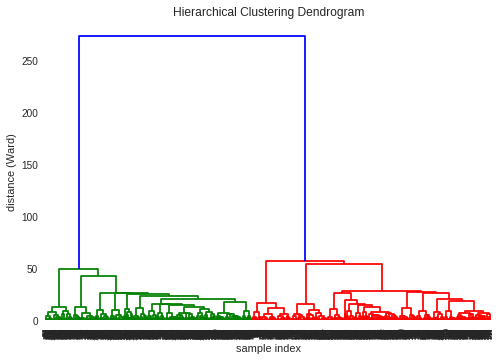

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(D, 'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, leaf_rotation=90)

Looks like we can take 6 clusters or even 14. But the number of clusters will end up being the number of possible predictions.

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(D) 

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 0, ..., 4, 4, 1])

In [0]:
print(cluster.labels_[:100])

[0 0 0 0 0 0 0 3 0 1 0 1 2 3 1 1 1 0 0 0 5 5 2 0 3 4 4 4 3 3 1 2 0 0 0 0 5
 1 1 1 1 1 1 2 5 5 4 2 0 1 3 0 0 4 1 3 1 3 0 4 4 0 3 0 0 4 4 3 3 3 4 4 4 4
 0 0 1 4 3 0 0 3 4 4 4 1 4 0 3 4 1 0 0 0 3 3 1 4 0 0]


In [0]:
cluster1_indices = [i for i,x in enumerate(cluster.labels_) if x==0]
cluster2_indices = [i for i,x in enumerate(cluster.labels_) if x==1]
cluster3_indices = [i for i,x in enumerate(cluster.labels_) if x==2]
cluster4_indices = [i for i,x in enumerate(cluster.labels_) if x==3]
cluster5_indices = [i for i,x in enumerate(cluster.labels_) if x==4]
cluster6_indices = [i for i,x in enumerate(cluster.labels_) if x==5]

In [0]:
cluster1_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster1_indices)]
cluster2_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster2_indices)]
cluster3_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster3_indices)]
cluster4_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster4_indices)]
cluster5_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster5_indices)]
cluster6_df = vantage2_dlvg[vantage2_dlvg.index.isin(cluster6_indices)]

In [0]:
import statistics
print(statistics.mean(cluster1_df['INCURRED']))
print(statistics.mean(cluster2_df['INCURRED']))
print(statistics.mean(cluster3_df['INCURRED']))
print(statistics.mean(cluster4_df['INCURRED']))
print(statistics.mean(cluster5_df['INCURRED']))
print(statistics.mean(cluster6_df['INCURRED']))
print()
print(statistics.median(cluster1_df['INCURRED']))
print(statistics.median(cluster2_df['INCURRED']))
print(statistics.median(cluster3_df['INCURRED']))
print(statistics.median(cluster4_df['INCURRED']))
print(statistics.median(cluster5_df['INCURRED']))
print(statistics.median(cluster6_df['INCURRED']))
print()
print(statistics.stdev(cluster1_df['INCURRED']))
print(statistics.stdev(cluster2_df['INCURRED']))
print(statistics.stdev(cluster3_df['INCURRED']))
print(statistics.stdev(cluster4_df['INCURRED']))
print(statistics.stdev(cluster5_df['INCURRED']))
print(statistics.stdev(cluster6_df['INCURRED']))

630218.8695652174
852503.0384615385
1584626.375
1340183
12899248
986865.2666666667

244127.0
373650.0
702755.0
218727.5
785000.0
196847

1037316.0586708932
1444831.7954507133
2206117.1856632903
3384025.768485577
34985517.17958738
2524201.700990928


In [0]:
mae1 = 0
mae2 = 0
mae3 = 0
mae4 = 0
mae5 = 0
mae6 = 0
m1 = statistics.mean(cluster1_df['INCURRED'])
m2 = statistics.mean(cluster2_df['INCURRED'])
m3 = statistics.mean(cluster3_df['INCURRED'])
m4 = statistics.mean(cluster4_df['INCURRED'])
m5 = statistics.mean(cluster5_df['INCURRED'])
m6 = statistics.mean(cluster6_df['INCURRED'])

for i in list(cluster1_df['INCURRED']):
  mae1 = mae1 + abs(i-m1)
  
for i in list(cluster2_df['INCURRED']):
  mae2 = mae2 + abs(i-m2)
  
for i in list(cluster3_df['INCURRED']):
  mae3 = mae3 + abs(i-m3)
  
for i in list(cluster4_df['INCURRED']):
  mae4 = mae4 + abs(i-m4)
  
for i in list(cluster5_df['INCURRED']):
  mae5 = mae5 + abs(i-m5)
  
for i in list(cluster6_df['INCURRED']):
  mae6 = mae6 + abs(i-m6)
  
print(mae1/len(list(cluster1_df['INCURRED'])))
print(mae2/len(list(cluster2_df['INCURRED'])))
print(mae3/len(list(cluster3_df['INCURRED'])))
print(mae4/len(list(cluster4_df['INCURRED'])))
print(mae5/len(list(cluster5_df['INCURRED'])))
print(mae6/len(list(cluster6_df['INCURRED'])))

678102.6332703215
920740.1730769228
1635106.4375
1852891.75
19808197.6
1219529.262222222


The error is very high for most of the clusters.